# **\[SOLAR_A\]** PLOT (Simulation)

JiyunLim  
2023-10-06

## Import

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [9]:
df = pd.read_csv('./data_eng_230710.csv')

In [10]:
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)
t = df.loc[:,'date']
regions = list(df.loc[:,'Bukchoncheon':'Gyeongju-si'].columns)

In [12]:
import os
fnames = ['./test/'+l for l in os.listdir('./test') if l[0] != '.']

df = pd.concat([pd.read_csv(fname) for fname in fnames]).reset_index(drop=True)

## Simulation Plot

### ver1. Compare separately by model

In [13]:
model_lst = df['model'].unique()
filter_lst = df['nof_filters'].unique()
lags_lst = df['lags'].unique()

In [18]:
def compare_plot(model_name, style='seaborn-white'):
    with plt.style.context(style):
        fig, axes = plt.subplots(4, 5, figsize=(15, 12))

        for i, lags in enumerate(lags_lst):
            for j, nof_filters in enumerate(filter_lst):
                df_ = df.query(f"model=='{model_name}' and lags=={lags} and nof_filters=={nof_filters}").groupby(by=['model','method','index_time']).agg({'mse':[np.mean]}).reset_index()
                sns.boxplot(x='method', y=('mse', 'mean'), data=df_, ax=axes[i, j])
                axes[i, j].set_title(f'lags={lags}, nof_filters={nof_filters}')
                axes[i, j].set_ylabel('MSE')
                axes[i, j].set_xlabel('')
        plt.subplots_adjust(top=0.95) 
        plt.suptitle(f"{model_name}", fontsize=16)
        plt.tight_layout()

`-` GConvGRU

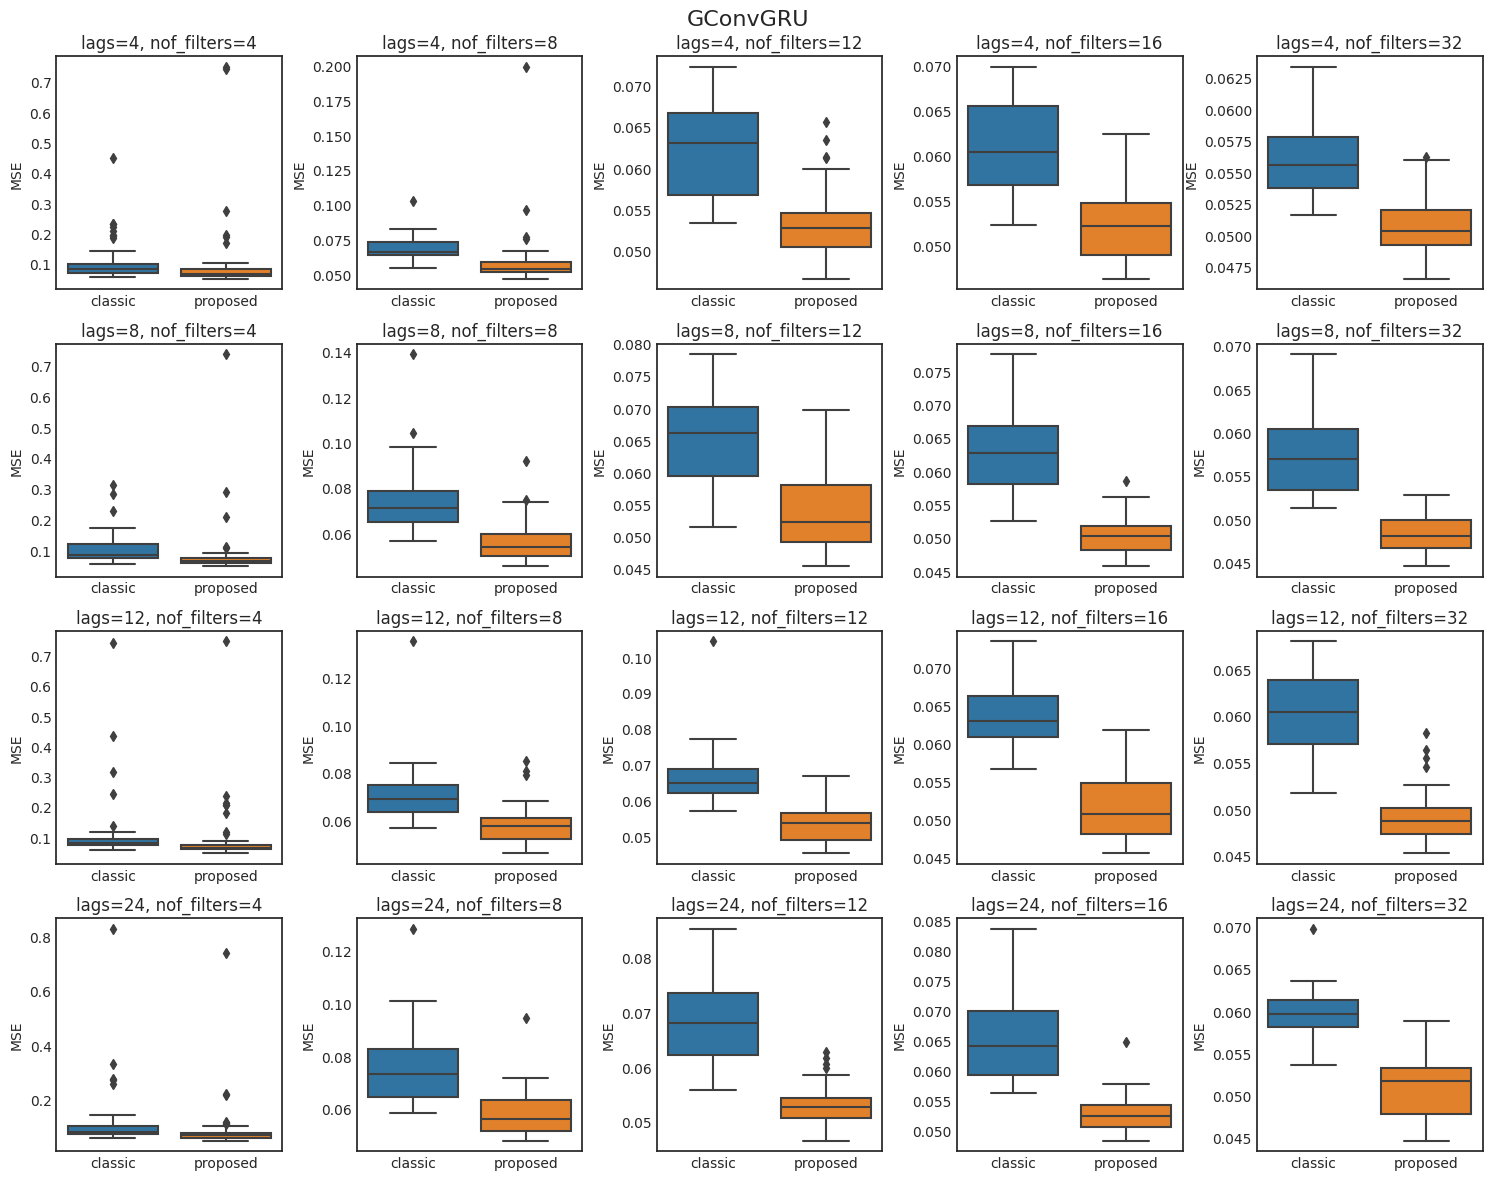

In [19]:
compare_plot('GConvGRU')

`-` DCRNN

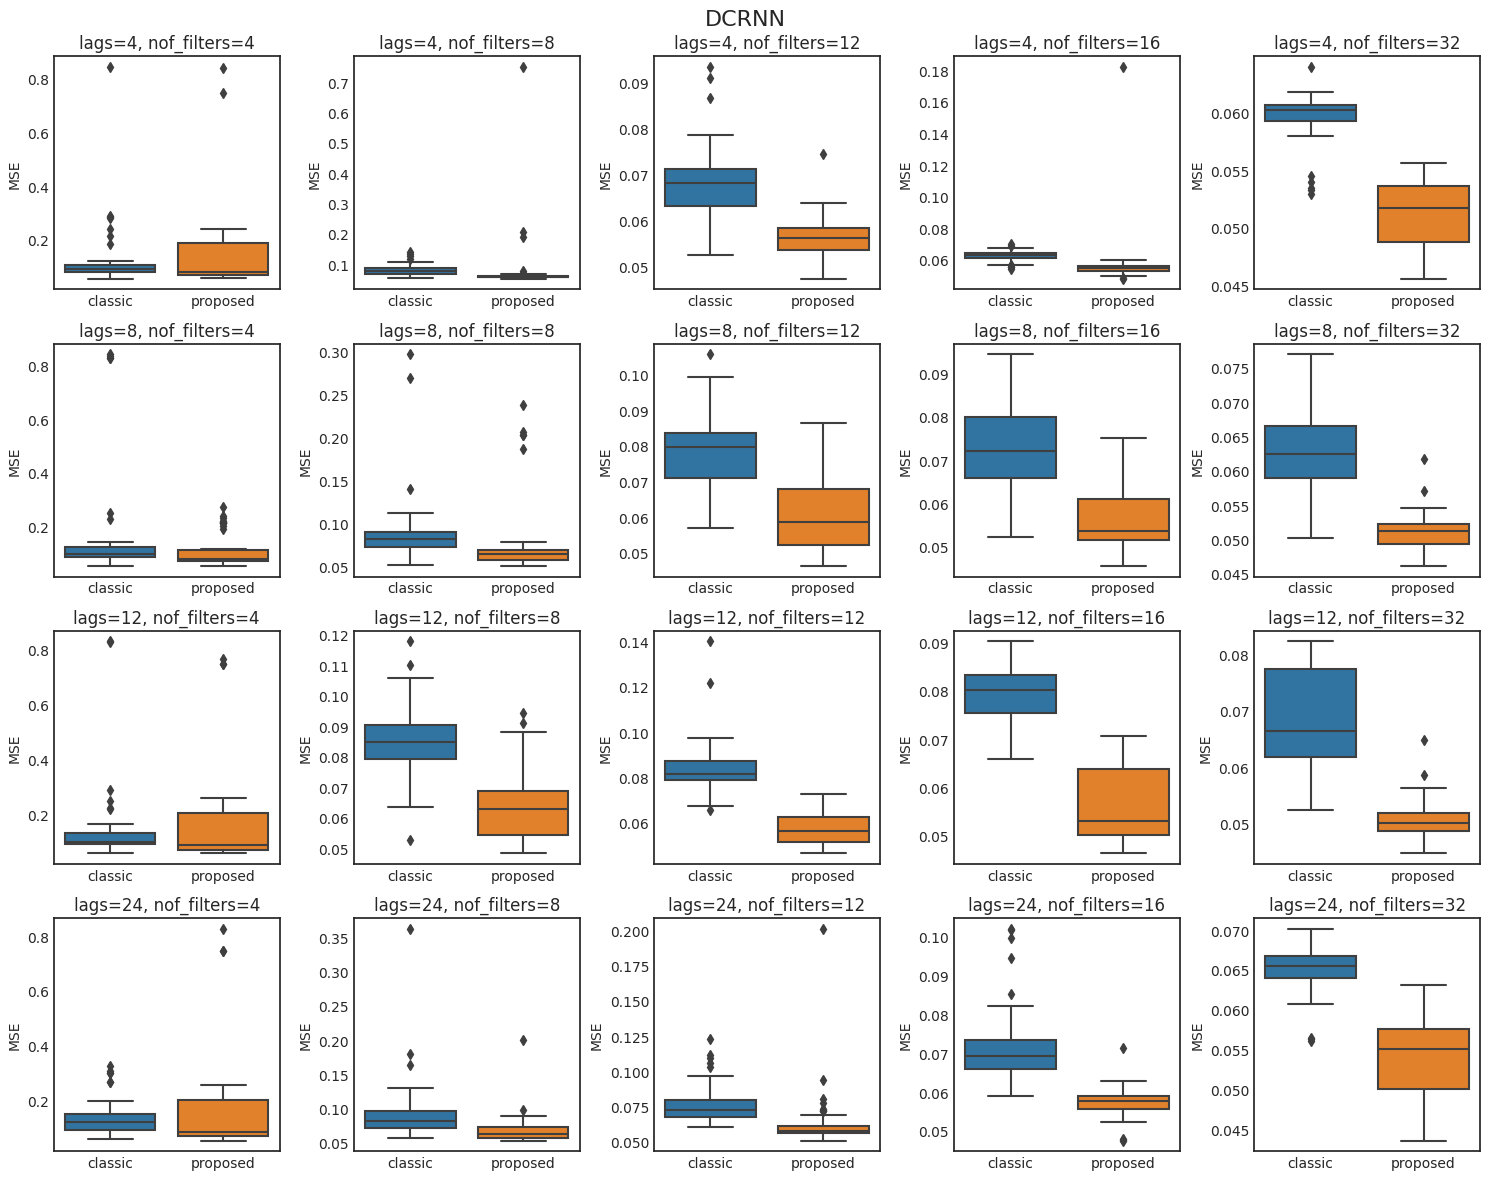

In [64]:
compare_plot('DCRNN')

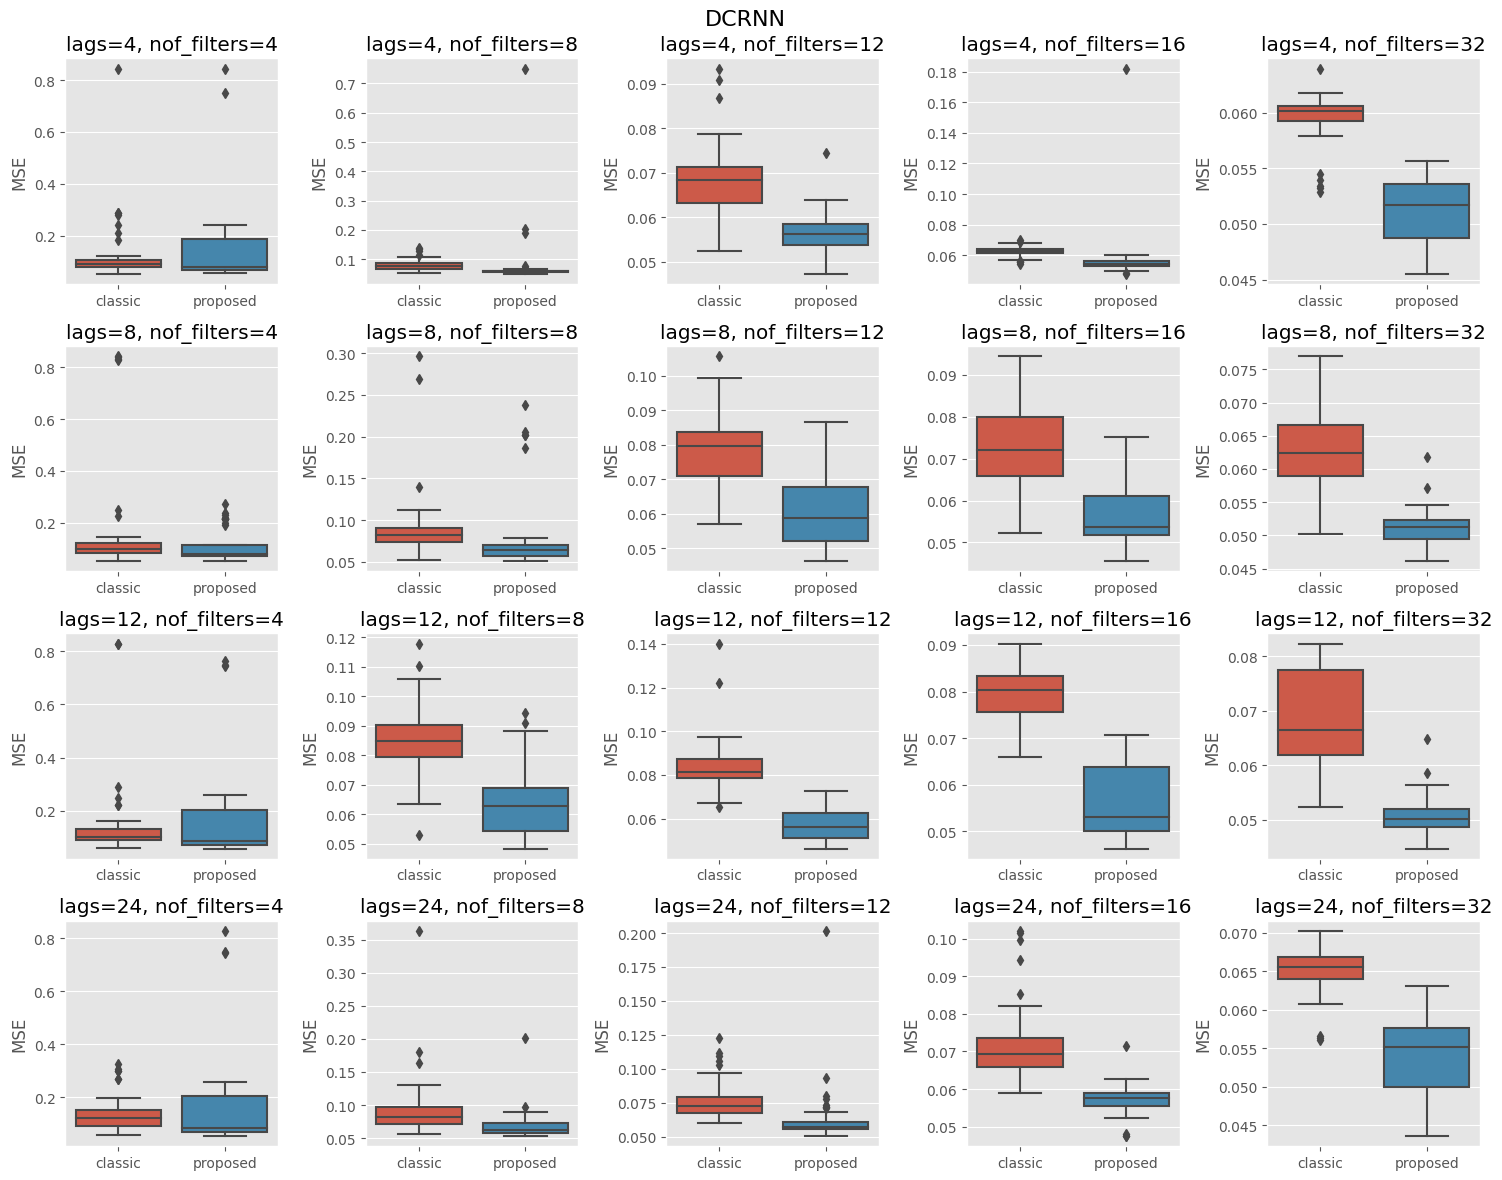

In [20]:
compare_plot('DCRNN', style='ggplot')

`-` TGCN

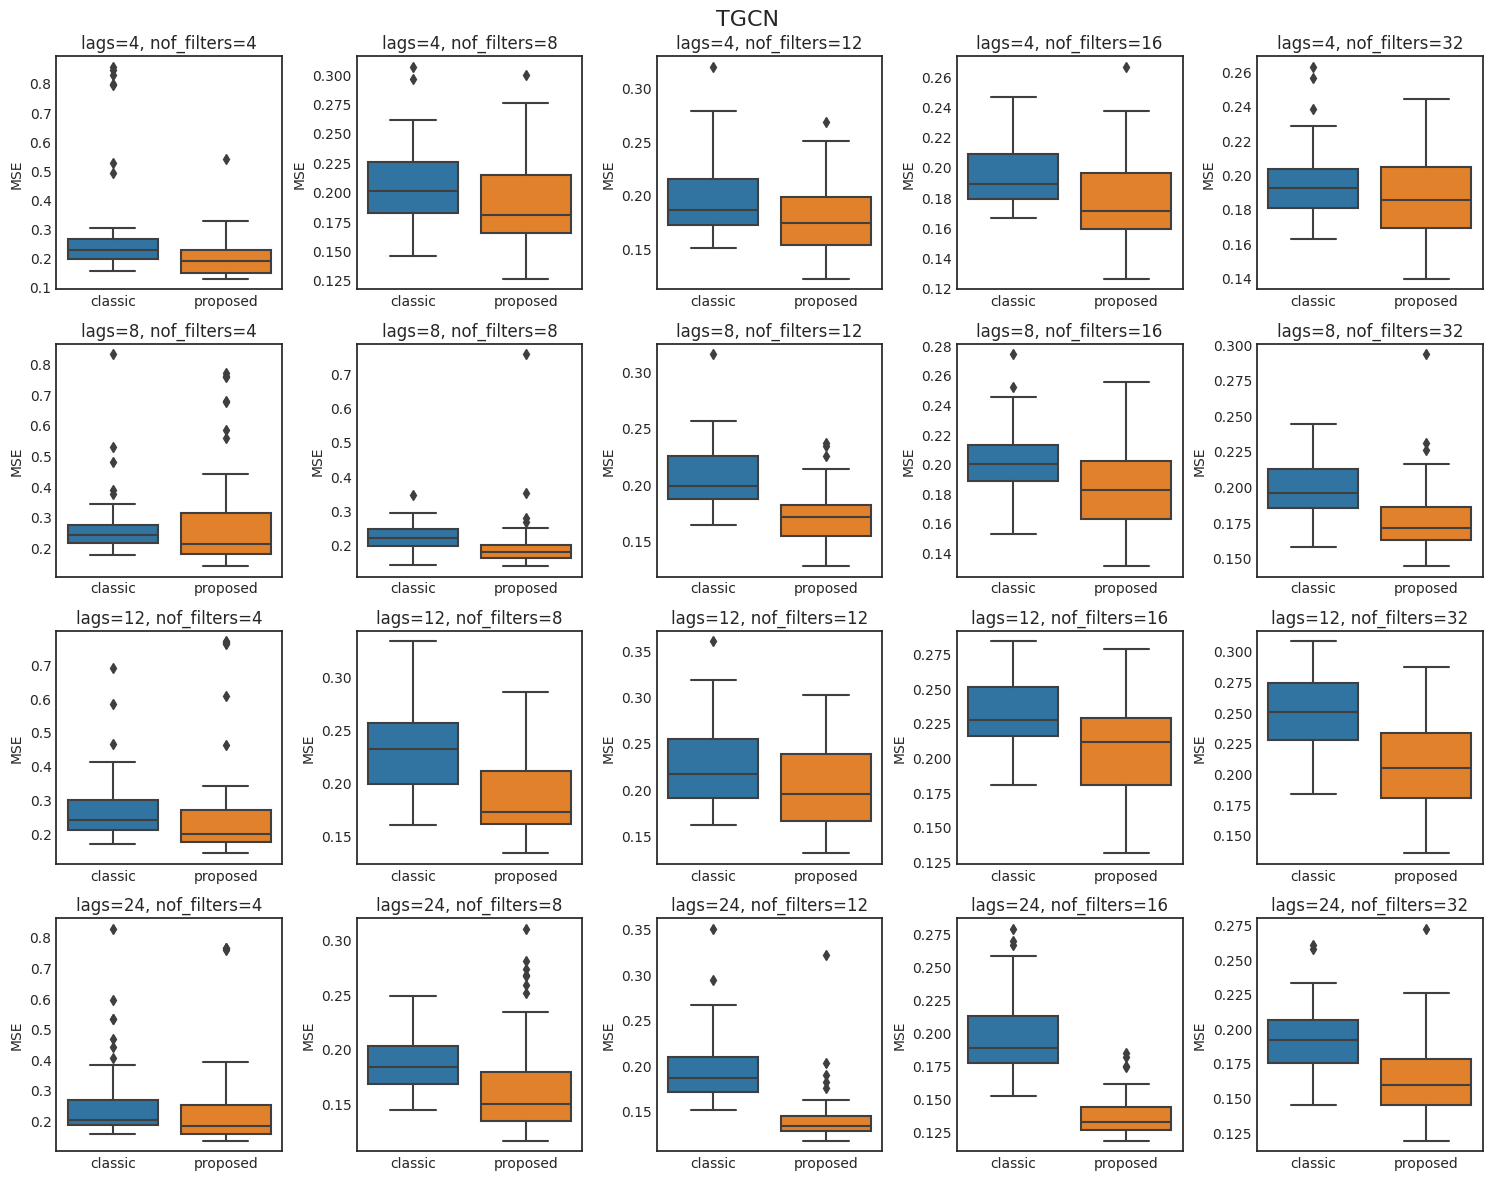

In [65]:
compare_plot('TGCN')

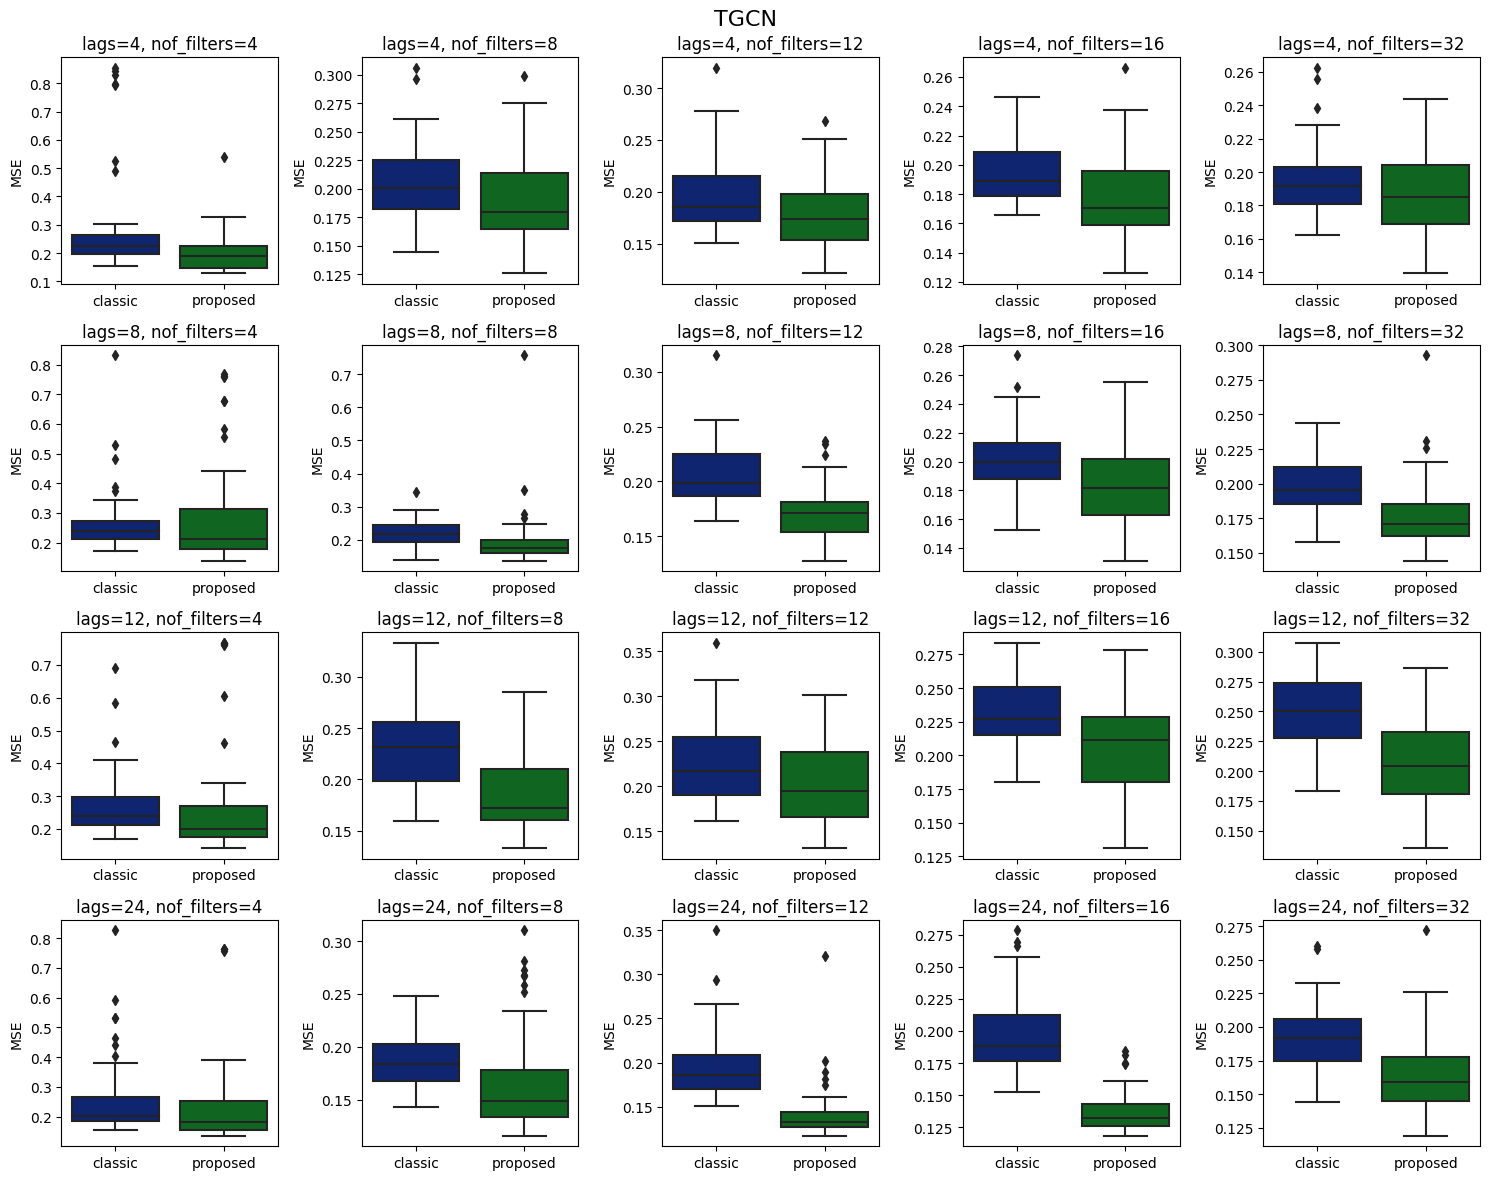

In [21]:
compare_plot('TGCN', style='seaborn-v0_8-dark-palette')

### ver2. Compare models with fixed lag and filter values

In [32]:
df['model'].unique()

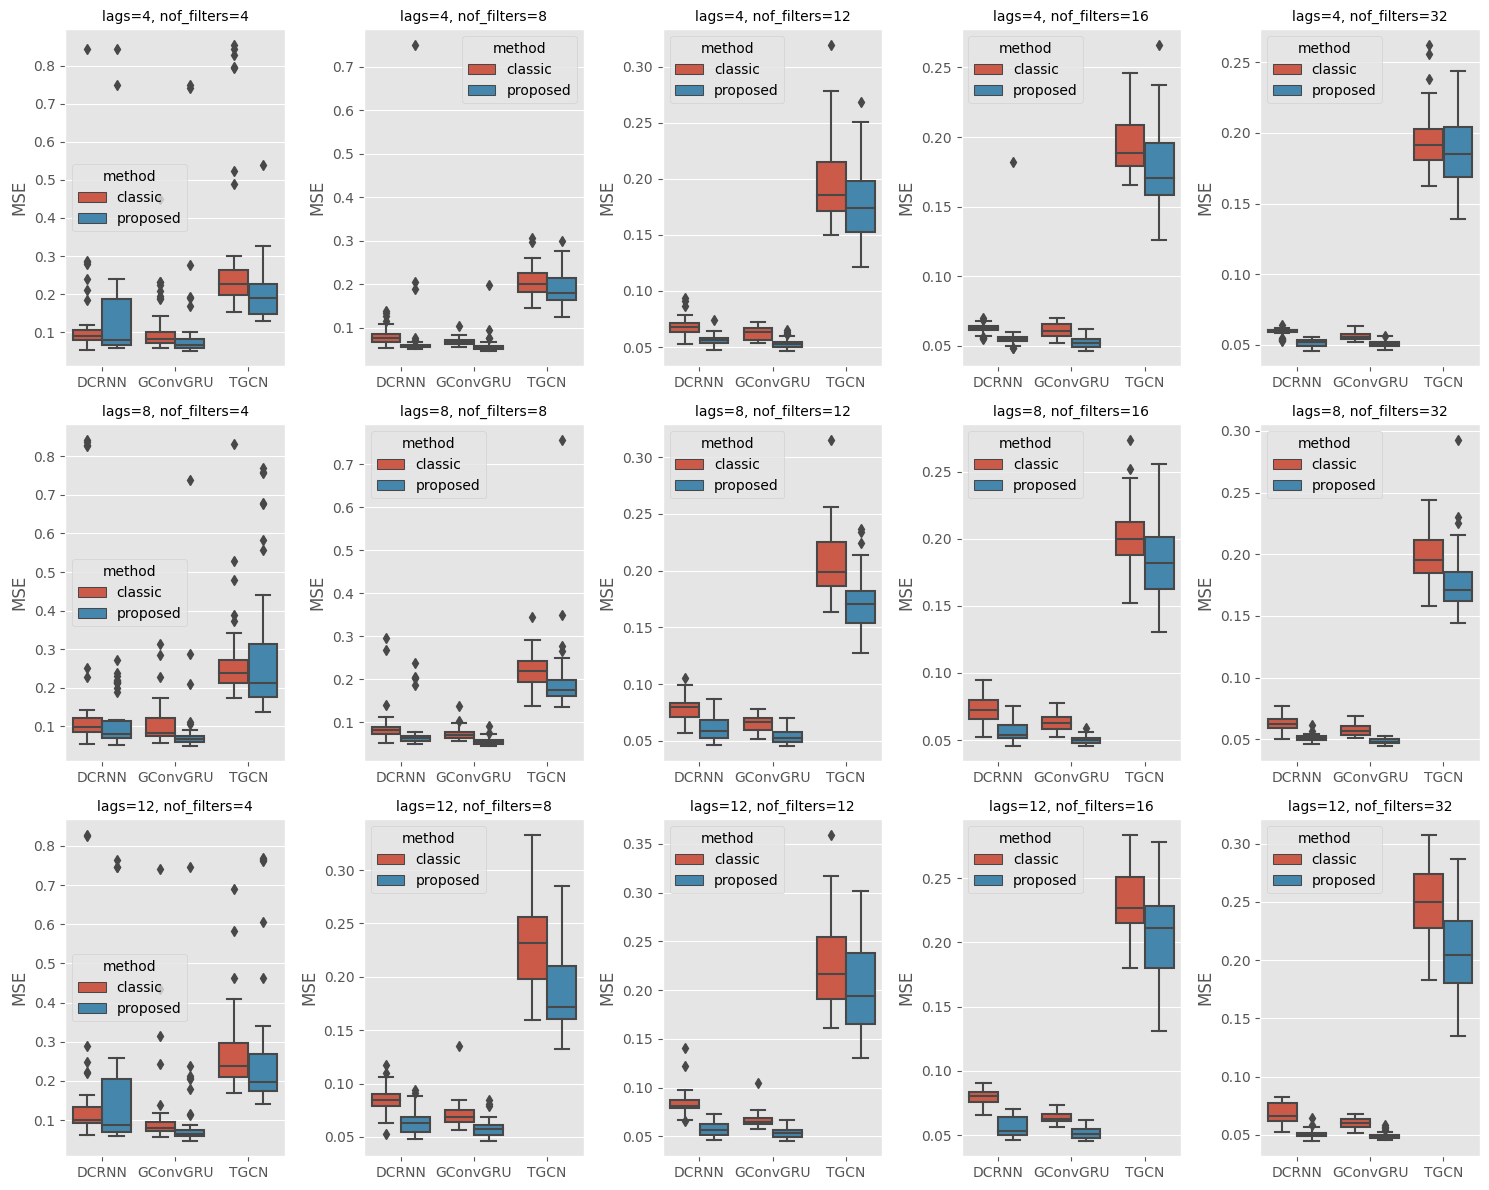

In [63]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(3, 5, figsize=(15, 12))    
    for i, lags in enumerate(lags_lst[:3]):
        for j, nof_filters in enumerate(filter_lst):
            df_ = df.query(f"lags=={lags} and nof_filters=={nof_filters}").groupby(by=['model','method','index_time']).agg({'mse':[np.mean]}).reset_index()
            sns.boxplot(x='model', y=('mse', 'mean'), hue='method', data=df_, ax=axes[i, j])
            axes[i, j].set_title(f'lags={lags}, nof_filters={nof_filters}', fontsize=10)
            axes[i, j].set_ylabel('MSE')
            axes[i, j].set_xlabel('')
    plt.subplots_adjust(top=0.95) 
    # plt.suptitle(f"{model_name}", fontsize=16)
    plt.tight_layout()

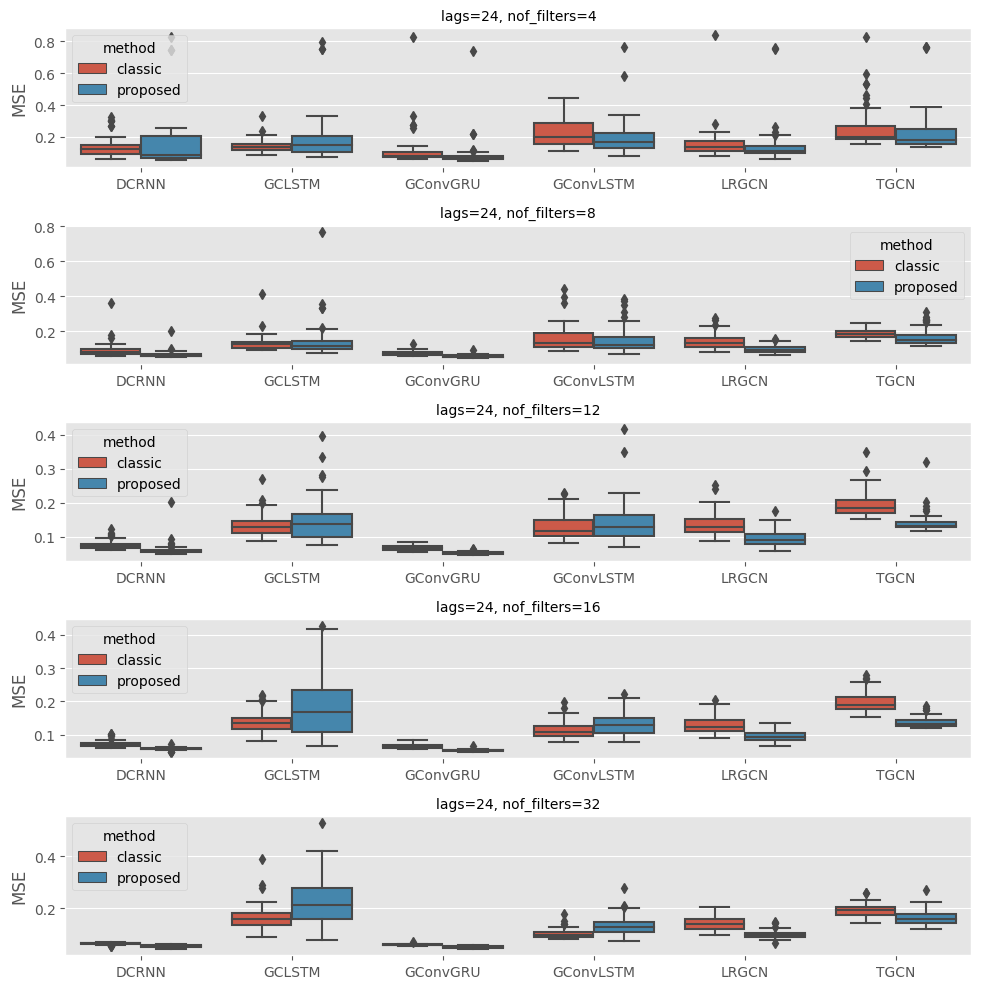

In [62]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(5, 1, figsize=(10, 10))    
    lags = lags_lst[3]
    for j, nof_filters in enumerate(filter_lst):
        df_ = df.query(f"lags=={lags} and nof_filters=={nof_filters}").groupby(by=['model','method','index_time']).agg({'mse':[np.mean]}).reset_index()
        sns.boxplot(x='model', y=('mse', 'mean'), hue='method', data=df_, ax=axes[j])
        axes[j].set_title(f'lags={lags}, nof_filters={nof_filters}', fontsize=10)
        axes[j].set_ylabel('MSE')
        axes[j].set_xlabel('')
# plt.subplots_adjust(top=0.95) 
# plt.suptitle(f"{model_name}", fontsize=16)
plt.tight_layout()